In [16]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import glob
import os
import cv2
import tifffile as tiff
import csv

In [17]:
pred = []
for file in os.listdir("data/mask"):
    if file.__contains__("masks"):
        im = Image.open(f"data/mask/{file}")
        pred.append(np.asarray(im))

In [18]:
gt= [] # ground truth

for file in os.listdir("data/gt/"):
    path = os.path.join("data/gt/", file)
    img = cv2.imread(path)
    gt.append(img[:,:,0])


In [19]:
def normalise(image):
    # Set the threshold value
    threshold = 0.1  # Adjust this threshold value as needed

    # Apply normalization
    normalized_image = np.where(image > threshold, 255, 0)

    # Convert the normalized NumPy array back to PIL image
    normalized_image = Image.fromarray(normalized_image.astype(np.uint8))

    # Display or save the normalized image
    return normalized_image

In [20]:
mem = normalised_image = list(map(normalise, pred))
gt = normalised_image = list(map(normalise, gt))

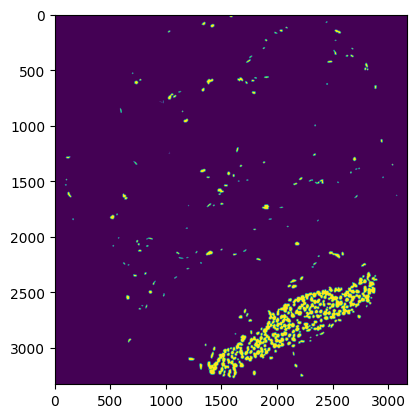

In [21]:
plt.imshow(pred[0],interpolation=None)

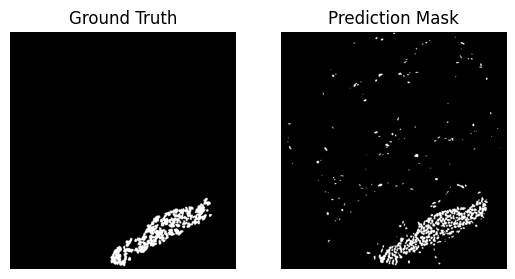

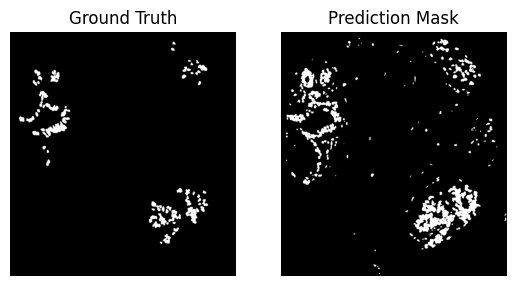

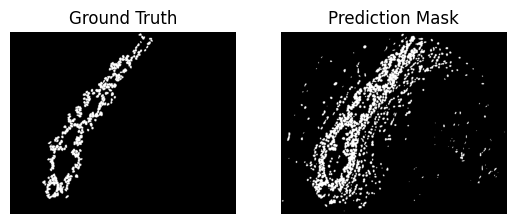

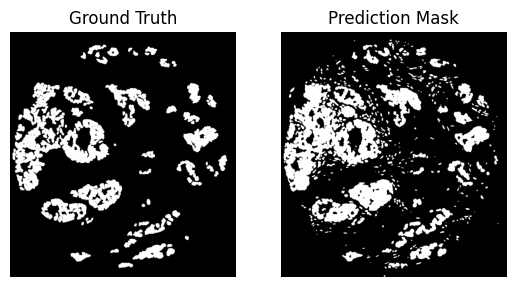

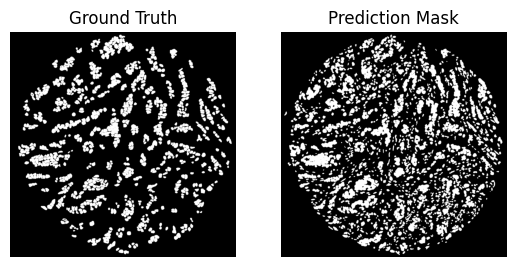

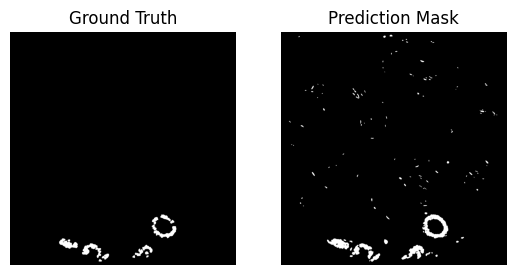

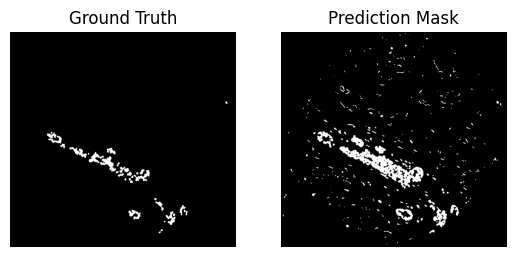

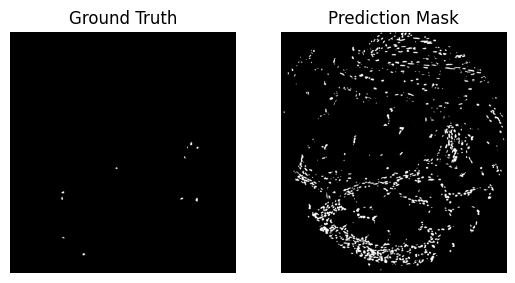

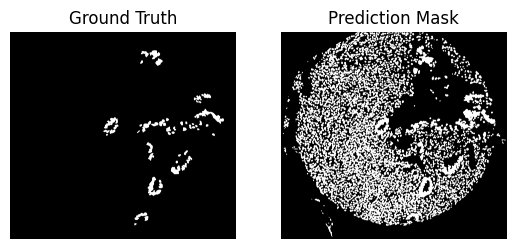

In [35]:
for i in range(0,len(gt)):
    fig, ax = plt.subplots(nrows=1,ncols=2)
    ax[0].imshow(gt[i], cmap = "gray")
    ax[0].set_axis_off()
    ax[0].set_title("Ground Truth")
    ax[1].imshow(pred[i], cmap = "gray")
    ax[1].set_axis_off()
    ax[1].set_title("Prediction Mask")
    plt.show()

In [24]:
def calculate_iou(binary_mask1, binary_mask2):
    # Calculate intersection and union
    intersection = np.logical_and(binary_mask1, binary_mask2)
    union = np.logical_or(binary_mask1, binary_mask2)


    # Avoid division by zero
    # if np.sum(union) == 0:
    #     return 0.0

    # Calculate IoU
    iou = np.sum(intersection) / np.sum(union)
    
    return iou

In [25]:
def dice_coefficicent(binary_mask1,binary_mask2,k=1):
        intersection = np.sum(np.asarray(binary_mask1)[np.asarray(binary_mask2)==k]) * 2.0
        dice = intersection / (np.sum(np.asarray(binary_mask1)) + np.sum(np.asarray(binary_mask2)))
        return dice

In [26]:
iou = list(map(calculate_iou, gt,pred))

In [27]:
dice = list(map(dice_coefficicent, gt, pred))